# Implementing MLPs with Keras
We'll be using Keras, which is a Deep Learning API that allows you to easily build, train, evaluate, and execute all types of neural networks. It was developed Francois Chollet as part of a research project, and it made open source in March 2015.

Tensorflow is a framework that multi functionality to perform Deep Learning, Tensorflow 2 has made Keras as its official API.
## Buildind an Image Classifier using the Sequential API
Install tensorflow and check the versions

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.4.1'

In [2]:
keras.__version__

'2.4.0'

### Using Keras to load the dataset
Keras provides some utility functions to fetch and load common datasets. Let's use Fashion MNIST, it is similar to MNIST but contain cloth images instead of digits.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Keras' Fashion MNIST gives 28x28 array for each image, type as integers, and ranges from 0 to 255 as pixel intensities. 

In [4]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train_full.dtype

dtype('uint8')

It already splits dataset into train and test, but not validation set. We'll use Gradient Descent so we must scale input features by dividing them by 255.0. Now, numbers are in range 0-1 and become float.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

For Fashion MNIST, we need the list of class names to know the labels.

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

### Creating the Model using the Sequential API

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Let's go though code:

- `Sequential` model is the simplest Keras model to compose a single stack of layers connected sequentially.
- Next, the first layer added to the model. It is a `Flatten` layer, whose role is to convert input shape as 1D array. It does not accept any parameters, since it is first layer you need to pass `input_shape`. Alternatively, you could add `keras.layers.InputLayer` with passing `input_shape=[28, 28]`.
- Next, we add a `Dense` layer with 300 neuron number passing to it. It has an activation function ReLU. It manages all weights and bias when receives inputs.

- Then we add another `Dense` layer with 100 neurons and activation as ReLU.
- Finally, we add a `Dense` output layer with 10 neurons (one per class), using the softmax activation function.

> Specifying `activation='relu'` is equivalent to `activation=keras.activations.relu`.

Instead of adding layers one by one, you could pass a list of layers when creating th `Sequential` model.

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The model's `summary()` method displays all the model's layers, including their name (which automatically created if not mentioned), output shape and number of parameters with total parameters, trainable and non-trainable parameter numbers.

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


> However, you can use `keras.utils.plot_model()` to generate an image of your model.

Note that, `Dense` layer has lot of parameters. This gives the model a lot of flexibility to fit the data, but it also means that model could overfit the data. Specially when you don't have lots of data.

You can easily get a list of layers.

In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [14]:
model.get_layer('dense_3') is hidden1

True

All the parameters can be accessed by `get_weights()` and `set_weights()` methods.

In [15]:
weights, bias = hidden1.get_weights()
weights, bias

(array([[-0.00206982,  0.03493267,  0.0091569 , ...,  0.06525832,
         -0.05459186,  0.05065851],
        [-0.04126098,  0.0593053 ,  0.00368364, ...,  0.013064  ,
          0.05187111,  0.00774974],
        [ 0.02220994,  0.00214276,  0.02497701, ..., -0.05574257,
         -0.01936175, -0.0181095 ],
        ...,
        [ 0.05952045,  0.05416371, -0.07029738, ...,  0.00786551,
          0.01186923, -0.06122747],
        [-0.04533949,  0.04343931,  0.02093161, ..., -0.04334065,
         -0.0294878 , -0.01689502],
        [-0.05332336, -0.05843108,  0.02125969, ..., -0.00840024,
          0.03568808,  0.00501072]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [16]:
weights.shape, bias.shape

((784, 300), (300,))

`Dense` layer initialize the connection weights randomly, and biases to zeros. If you want to change initialization, you can set `kernel_initializer` (kernel is another name of matrix of connection weights) or `bias_initializer` when creating the layer.

> The shape of the weigthts matrix depends on the input shape. That's why we need to specify input shape at start. But if you don't that's okay Keras will wait until you pass it the data or you can call its `build()` mehod. 



### Compiling the Model
After a model is created, you must call its `compile()` method to specify loss and optimizer, optionally you can specify some metrics to compute during training and evaluation.

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

> Using `loss='sparse_categorical_crossentropy'` is equivalent to `loss=keras.losses.sparse_categorical_crossentropy`, same goes for optimizers and metrics.

We use `sparse_categorical_crossentropy` loss because we have sparse labels (i.e. for each instances, there is just a target class index, from 0 to 9). If we had one-hot vectors then we'll use `categorical_crossentropy` loss instead. If we were doing binary classification binary classification, then we should use `sigmoid` activation function in the output layer, and we would use the `binary_crossentropy` loss.

> If you want to convert sparse labels to one-hot vector labels, use `keras.utils.to_categorical()` function. To go other way around, use the `np.argmax()` function with `axis=1`.

For optimizer `"sgd"` means that we will train model using simple Stochastic Gradient Descent.

> When using SGD optimizer, it is important to tune the learning rate. So, you will generally want to use `optimizer=keras.optimizers.SGD(lr=???)` to set the learning rate, which defaults to `lr=0.01`

Finally, metrics is `"accuracy"` which is calculated during training and evaluation.

### Training and evaluating the Model

For this we simply call its `fit()` method.

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0076 - accuracy: 0.6797 - val_loss: 0.5114 - val_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5032 - accuracy: 0.8266 - val_loss: 0.4391 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8426 - val_loss: 0.4249 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4209 - accuracy: 0.8525 - val_loss: 0.4007 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4000 - accuracy: 0.8582 - val_loss: 0.3759 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3869 - accuracy: 0.8636 - val_loss: 0.3831 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3732 - accuracy: 0.8683 - val_loss: 0.3652 - val_accuracy:

We pass it the input features (X_train) and the target classes (y_train), as well as number of epochs to train (defaults to 1).  We also pass it validation set (which is optional), Keras will measure the loss and other metrics on this set at the end of each epoch, which is very helpful to see. 

If performance on training set is much better than on the validation set, your model is probably overfitting the training set.

> Instead of passing a validation set, you could set `validation_split` to the ratio you want. For example, `validation_split=0.1` last 10% of training data will be used for validation.

If training set was very skewed, with some classes being over-represented than other, you could use `class_weight` argument in `fit()`, this would give extra weight to under-represented class while calculating the loss. If you need per-instance weights, use `sample_weight` argument, it would be useful if some instances were labeled by experts while other labeled by crowdsourcing platform: it gives more weight to the expert ones. You can also pass sample weight (not class weight) in `validation_data` tuple as third argument.

The `fit()` method returns a `history` object which contains the training parameters (`history.params`), the list of epochs (`history.epoch`), and most important dictionary (`history.history`) containing loss and extra metrics it measured. You could plot history using pandas `DataFrame` to get learning curves.



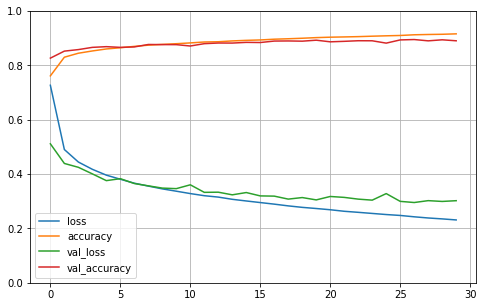

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here you would see that training and validation curves are close which is good. At first, it seems validation is good because validation error is computed at the end of epoch and training loss is computed during each epoch. So training curve should be shifted half the epoch to the left. Then you see overlapping curves at the start.

> When plotting training curves, it should be shifted by half an epoch to the left.

If you want to train longer you can call `fit()` method and Keras will continue the training.

If you didn't satisfy with the training try tuning the hyperparameters. The first one to check is learning rate, then optimizer, then model's hyperparameters such as number of layers, number of neurons, and activation functions. You could also tune batch size (which can be set in `fit()` method as `batch_size` argument, defaults to 32) and number of epochs.

Now, it's time to evaluate model on the test set to see the generalization error.



In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.8660 - accuracy: 0.8518


[59.86600112915039, 0.8518000245094299]

Generally, test set performance is slightly lower than validation set, because the hyperparameters tuned on validation set. And do not try to tune hyperparameters on the test set.

#### Using the Model to make predictions

Next, we can use model `predict()` method for predictions.

In [21]:
X_new = X_test[:3]
y_probs = model.predict(X_new)
y_probs.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

This will give you probabilities for each class. If you only want class then you can use `np.argmax()` method with `axis=-1`.

> Use  `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).`(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [23]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP Using the Sequential API

Let's do some linear regression using neural networks. We'll use Sklearn's `fetch_california_housing()` dataset, and do some preprocessing.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Now, we use Sequential API to build, train, evaluate, and use a MLP regression model for predictions. The output layer has a single neuron to predict a value and has no activation function, and the mean squared error as loss function.

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_val, y_val))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2898 - val_loss: 0.5643
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5901 - val_loss: 0.5281
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5003 - val_loss: 0.4902
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4852 - val_loss: 0.4690
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4791 - val_loss: 0.4571
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4408 - val_loss: 0.4514
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4499 - val_loss: 0.4392
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4090 - val_loss: 0.4347
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4288 - val_loss: 0.4294
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4177 - val_loss: 0.4197

array([[3.9176114 ],
       [0.57594985],
       [4.932582  ]], dtype=float32)

Sequential API is quit easy and common, but sometimes we need to build more complex architectures like with multiple inputs or outputs. For this purpose, Keras offers a *Functional API*.

## Building Complex Models using Functional API

One example of non-sequential neural network is *Wide & Deep* neural networks. It connects all or part of the inputs to the outputs, which helps to learn both deep patterns (using deep path) and simple patterns (using short path).

Let's build such a neural network:  

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Let's go through this code:

- First, we need to create an `Input` object. Which specifies the input kind to the model.
- Next, we create a normal `Dense` layer. Notice, we call it like a function, passing it the input. This is why this is called Functional API. 
- Then we pass output of first hidden to another.
- Next, we create a `Concatenate` layer, we pass it the input and the output of second hidden layer. You may prefer `keras.layers.concatenate()` function.
- Then we create an output layer, passing in result of the concatenation.
- Lastly, we create a Keras `Model`, specifying which inputs and outputs to use.

After that all steps are same.

But what if you want to send a subset of the features through the wide path and different (possibly overlapping) to the deep path? Solution is to use multiple inputs. For example, suppose we want to pass five features through wide path (0 to 4), and six features to deep path (2 to 7):



In [29]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

The code is self-explanatory. You should name the important layers when model get complex. Now to call `fit()` you need to pass it a pair of input matrices `(X_train_A, X_train_B)`, one for each. This is true for each `X_val`, `X_test`, and `X_new` when you call `evaluate()` or `predict()`.

> Alternatively, you could pass a dictionary mapping the input names to the input matrices, like `{'wide_input': X_train_A, 'deep_input': X_train_B}`.



In [30]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_val_A, X_val_B), y_val))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.7520 - val_loss: 0.9681
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8430 - val_loss: 0.7589
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7138 - val_loss: 0.6940
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6706 - val_loss: 0.6567
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6324 - val_loss: 0.6290
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5831 - val_loss: 0.6045
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5566 - val_loss: 0.5854
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5683 - val_loss: 0.5703
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5501 - val_loss: 0.5565
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5615 - val_loss: 0.5468

array([[2.9436855],
       [1.2431078],
       [5.2231183]], dtype=float32)

There are many use cases when you may want multiple outputs:

- For object detection, you may want to locate (regression) and classify (classification) an object in a picture.
- If you have multiple independent tasks on the same data. Sure, you could train multiple neural networks for each task but training a single might get you better performance by learning across features. For example, you can perform *multitask classification*.
- One use case is used as regularization technique by adding some auxiliary outputs in a neural network architecture to ensure that the underlying part of the networks learn something useful.

Adding extra outputs is quite easy:

In [31]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output will need its own loss function. Therefor, when we compile the model, we should pass a list of losses (or a dictionary mapping output names to losses). If we pass a single loss, Keras will assume same loss for all outputs. Keras will compute all these losses and add them up at last. Since, main outputs are more important than auxiliary ones, we can add weight to main output.

In [32]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

Now when we train the model it should expect labels for each output. In this example the labels are same, so instead of passing `y_train`, we need to pass `(y_train, y_train)` (and same goes for `y_val` and `y_test`).

In [33]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7457 - main_output_loss: 1.5220 - aux_output_loss: 3.7588 - val_loss: 0.6087 - val_main_output_loss: 0.5422 - val_aux_output_loss: 1.2075
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5623 - main_output_loss: 0.5097 - aux_output_loss: 1.0352 - val_loss: 0.5396 - val_main_output_loss: 0.4950 - val_aux_output_loss: 0.9411
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4946 - main_output_loss: 0.4559 - aux_output_loss: 0.8429 - val_loss: 0.5207 - val_main_output_loss: 0.4890 - val_aux_output_loss: 0.8059
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4949 - main_output_loss: 0.4662 - aux_output_loss: 0.7528 - val_loss: 0.4773 - val_main_output_loss: 0.4515 - val_aux_output_loss: 0.7089
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4621 - main_output_loss: 0.4393 - aux_output_loss: 0.6676 - val_loss

When we evaluate the model, Keras will return total loss, as well as all the individual losses. Similarly, `predict()` will return predictions for each output.



In [34]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

162/162 [==============================] - 0s 831us/step - loss: 0.3684 - main_output_loss: 0.3574 - aux_output_loss: 0.4676


(array([[3.143724 ],
        [1.1296512],
        [5.0402637]], dtype=float32),
 array([[2.5922377],
        [1.009677 ],
        [4.452898 ]], dtype=float32))

## Using the Subclassing API to Build Dynamic Models

Both Sequential API and Functional API are declarative: you start by declaring layers and how should they connect to each other. But they are static; you cannot involve loops, varying shapes, conditional branching, and other dynamic behaviors. For this you'll use Subclassing API.

Simply subclass the `Model` class, create the layers you need in the constructor, and use them to perform the computations you want in the `call()` method.

In [35]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

The main difference here is you can do anything in `call()` method: for loops, if else, low-level TensorFlow operations. This makes it a great API for researchers experimenting with new ideas.

> Keras models have an `output` attribute, that's why we use `main_output` name.

This extra flexibility comes with a cost: your model's architecture is hidden within `call()` method, so Keras cannot easily inspect it; it cannot save it or clone it; and when you call `summary()` method it only give list of layers not how they are connected.

## Saving and Restoring a Model

Saving trained models made by Sequential API or Functional API is as simple as this:

In [36]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_val_A, X_val_B], [y_val, y_val]))

model.save('my_keras_model.h5')

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5807 - main_output_loss: 1.4653 - aux_output_loss: 2.6198 - val_loss: 0.6128 - val_main_output_loss: 0.5410 - val_aux_output_loss: 1.2594
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7597 - main_output_loss: 0.7154 - aux_output_loss: 1.1592 - val_loss: 0.5601 - val_main_output_loss: 0.5084 - val_aux_output_loss: 1.0256
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5519 - main_output_loss: 0.5062 - aux_output_loss: 0.9628 - val_loss: 0.5152 - val_main_output_loss: 0.4765 - val_aux_output_loss: 0.8630
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4997 - main_output_loss: 0.4648 - aux_output_loss: 0.8133 - val_loss: 0.4878 - val_main_output_loss: 0.4570 - val_aux_output_loss: 0.7647
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4861 - main_output_loss: 0.4578 - aux_output_loss: 0.7409 - val_loss

Keras will use `HDF5` format to save both model's architecture (including every layer's hyperparameters) and the values of all the parameters for every layer. It also saves the optimizer.

And loading the model is just as easy:

In [37]:
model = keras.models.load_model('my_keras_model.h5')

> If you use Subclassing API, then you can save model's parameters by `save_weights()` and load them by `load_weights()`. But you have to save everything else by yourself as a Dictionary maybe.

But what if your training lasts several hours? Then you should save checkpoints for every epoch, in case you system crashes this will save everything your model learned so far. This can be done using callbacks.

## Using Callbacks

The `fit()` method accepts a `callbacks` argument that lets you specify when to save model. For example, `ModelCheckpoint` callback saves checkpoint at regular intervals (by default after each epoch):

In [38]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_val_A, X_val_B], [y_val, y_val]),
                   callbacks=[checkpoint_cb])

model = keras.models.load_model('my_keras_model.h5')

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6606 - main_output_loss: 1.5197 - aux_output_loss: 2.9291 - val_loss: 0.6142 - val_main_output_loss: 0.5526 - val_aux_output_loss: 1.1684
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6099 - main_output_loss: 0.5594 - aux_output_loss: 1.0646 - val_loss: 0.5501 - val_main_output_loss: 0.5042 - val_aux_output_loss: 0.9626
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5255 - main_output_loss: 0.4835 - aux_output_loss: 0.9035 - val_loss: 0.5055 - val_main_output_loss: 0.4696 - val_aux_output_loss: 0.8284
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5015 - main_output_loss: 0.4712 - aux_output_loss: 0.7749 - val_loss: 0.4776 - val_main_output_loss: 0.4482 - val_aux_output_loss: 0.7423
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5013 - main_output_loss: 0.4737 - aux_output_loss: 0.7496 - val_loss

If you use validation data then set `save_best_only=True` will save only best performance one so far. This will be best on validation set.

Another way is use the `EarlyStopping` callback: it will interrupt training when there is no progress on the validation set for a number of epochs (defined by `patience` argument), and it will optionally roll back to the best model. You can combine both; this will useful in both ways if you computer crashes or stop early when there is no progress.

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                   validation_data=([X_val_A, X_val_B], [y_val, y_val]),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3787 - main_output_loss: 0.3644 - aux_output_loss: 0.5073 - val_loss: 0.3697 - val_main_output_loss: 0.3557 - val_aux_output_loss: 0.4954
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - main_output_loss: 0.3590 - aux_output_loss: 0.5000 - val_loss: 0.3756 - val_main_output_loss: 0.3613 - val_aux_output_loss: 0.5047
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3598 - main_output_loss: 0.3449 - aux_output_loss: 0.4932 - val_loss: 0.3595 - val_main_output_loss: 0.3458 - val_aux_output_loss: 0.4827
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3575 - main_output_loss: 0.3430 - aux_output_loss: 0.4873 - val_loss: 0.3631 - val_main_output_loss: 0.3493 - val_aux_output_loss: 0.4877
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3548 - main_output_loss: 0.3408 - aux_output_loss: 0.4812 - val

You can set large number of epochs since it will stop automatically after no progress.

If you need extra control, you can easily build your custom callback. There is an example of displaying ratio of validation loss and training loss:

In [40]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f"\nval/train: {logs['val_loss']/logs['loss']:.2f}")

ratio_cb = PrintValTrainRatioCallback()
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_val_A, X_val_B], [y_val, y_val]),
                   callbacks=[ratio_cb])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3199 - main_output_loss: 0.3109 - aux_output_loss: 0.4006 - val_loss: 0.3275 - val_main_output_loss: 0.3196 - val_aux_output_loss: 0.3986

val/train: 1.02
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3192 - main_output_loss: 0.3105 - aux_output_loss: 0.3981 - val_loss: 0.3271 - val_main_output_loss: 0.3186 - val_aux_output_loss: 0.4031

val/train: 1.02
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3210 - main_output_loss: 0.3122 - aux_output_loss: 0.3997 - val_loss: 0.3412 - val_main_output_loss: 0.3335 - val_aux_output_loss: 0.4108

val/train: 1.06
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3204 - main_output_loss: 0.3117 - aux_output_loss: 0.3983 - val_loss: 0.3240 - val_main_output_loss: 0.3158 - val_aux_output_loss: 0.3980

val/train: 1.01
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

>`on_epoch_end()` is predefined method, there are others which you can use like `on_epoch_begin()`. There are such methods for test and predict also, if you need debugging in those cases.

## Using TensorBoard for Visualization

TensorBoard is a great interactive visualization tool that you can use to 

- view the learning curves during multiple runs,
- visualize the computation graph,
- analyze training statistics,
- view images generated by your model,
- visualize complex multidimensional data projected down to 3D, and
- automatically clustered for you and more!

To use it, you need to modify your program including a special binary file called *event files*. Each binary data is called a *summary*. TensorBoard server will monitor the log directory. We have to point TensorBoard to the root directory and configure your program so that it writes in different directory every time it runs. This way your logs won't mixed up.

Let's make it:

In [41]:
import os

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_val, y_val),
                   callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.0155 - val_loss: 0.7296
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5633 - val_loss: 0.4930
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4670 - val_loss: 0.4504
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4291 - val_loss: 0.4122
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3935 - val_loss: 0.4107
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4041 - val_loss: 0.3967
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3842 - val_loss: 0.3937
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3779 - val_loss: 0.3968
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3618 - val_loss: 0.3804
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3559 - val_loss: 0.3791

It will automatically create needed folders and events as well as profile traces: that tells you much time your model takes on each part, and across all your devices, which is great for locating bottlenecks.

Next you need to start the TensorBoard server, you can do this by command line:

`$ tensorboard --logdir=./my_logs --port=6006`

Once the server is up go to web browser and visit *https://localhost:6006*.

There you can see TensorBoard web interface. Click the SCALARS tab to view learning curves.

Additionally, TensorFlow offers a lower-level API in the `tf.summary` package. Which creates a `SummaryWriter` using the `create_file_writer()` function.